In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
# %matplotlib inline   # for jupyter notebook ----> figures to output in cell instead of opened as new page

In [ ]:
df = pd.read_csv('/content/Placement_Data_Full_Class.csv')
df.head(2)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0


In [ ]:
df=df.set_index('sl_no')
df.head(2)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0


In [ ]:
# df=df.rename(columns={'ssc_b':'ssc_board','hsc_b':'hsc_board','hsc_s':'hsc','degree_t':'degree_type','workex':'work_experience'})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 215 entries, 1 to 215
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 25.2+ KB


In [ ]:
df.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [ ]:
df.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status',
       'salary'],
      dtype='object')

In [ ]:
catvars = []
numvars = []

for col in df.columns:
    if df[col].dtype == 'object':
        catvars.append(col)
    else:
        numvars.append(col)

print(catvars, numvars)


['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status'] ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']


In [ ]:
df.isnull().sum()

,0
gender,0
ssc_p,0
ssc_b,0
hsc_p,0
hsc_b,0
hsc_s,0
degree_p,0
degree_t,0
workex,0
etest_p,0


### Handling Null values

In [ ]:
df.shape

(215, 14)

In [ ]:
def plotdistplot(col):

    plt.figure(figsize=(15,7))
    sn.distplot(df['salary'],kde=True,hist=False,label='Actual Salary',color='orange')
    sn.distplot(df[col],kde=True,hist=False,label=col,color='black')


In [ ]:
# df['salary'].value_counts()
# dict(df['salary'].value_counts())

In [ ]:
mostfreq = list(dict(df['salary'].value_counts()).items())[0]
mostfreq

(300000.0, np.int64(22))

In [ ]:
print(df['salary'].mode())
print(df['salary'].median())
print(df['salary'].mean())


0    300000.0
Name: salary, dtype: float64
265000.0
288655.4054054054


In [ ]:
df['salary'].mean()  # average salary

np.float64(288655.4054054054)

In [ ]:
df['salary_mean'] = df['salary'].fillna(df['salary'].mean())
df['salary_median'] = df['salary'].fillna(df['salary'].median())
df['salary_mode'] = df['salary'].fillna(df['salary'].mode()[0])
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,salary_mean,salary_median,salary_mode
sl_no,,,,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0,270000.000000,270000.0,270000.0
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0,200000.000000,200000.0,200000.0
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0,250000.000000,250000.0,250000.0
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN,288655.405405,265000.0,300000.0
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0,425000.000000,425000.0,425000.0


/tmp/ipython-input-359303696.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(df['salary'],kde=True,hist=False,label='Actual Salary',color='orange')
/tmp/ipython-input-359303696.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(df[col],kde=True,hist=False,label=col,color='bl

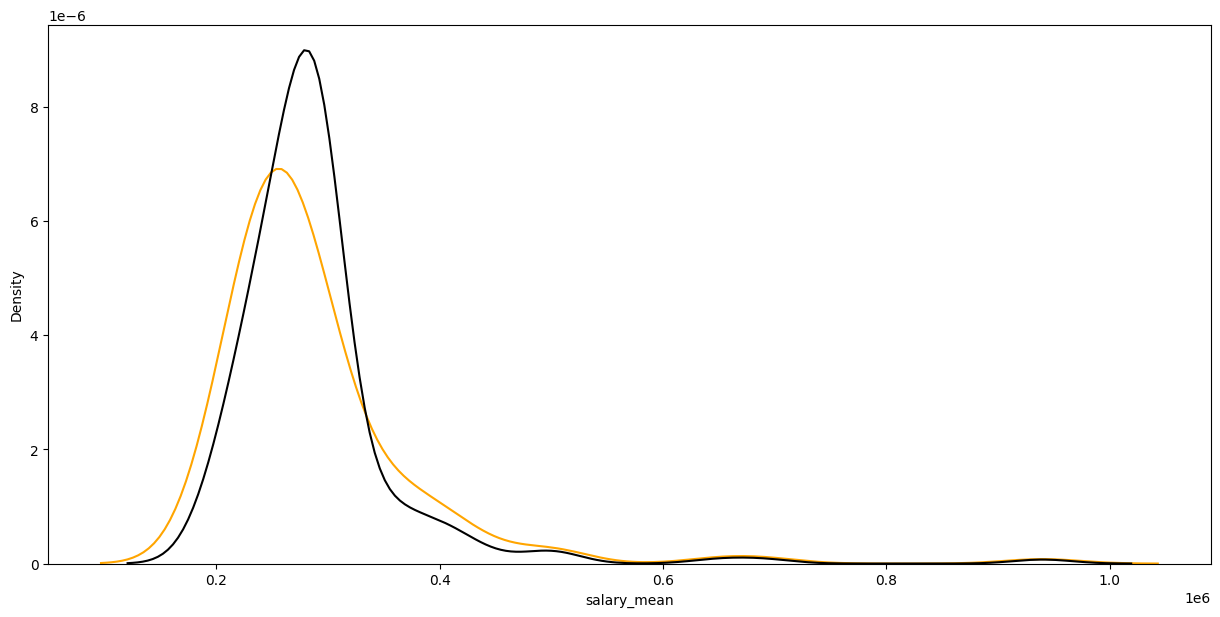

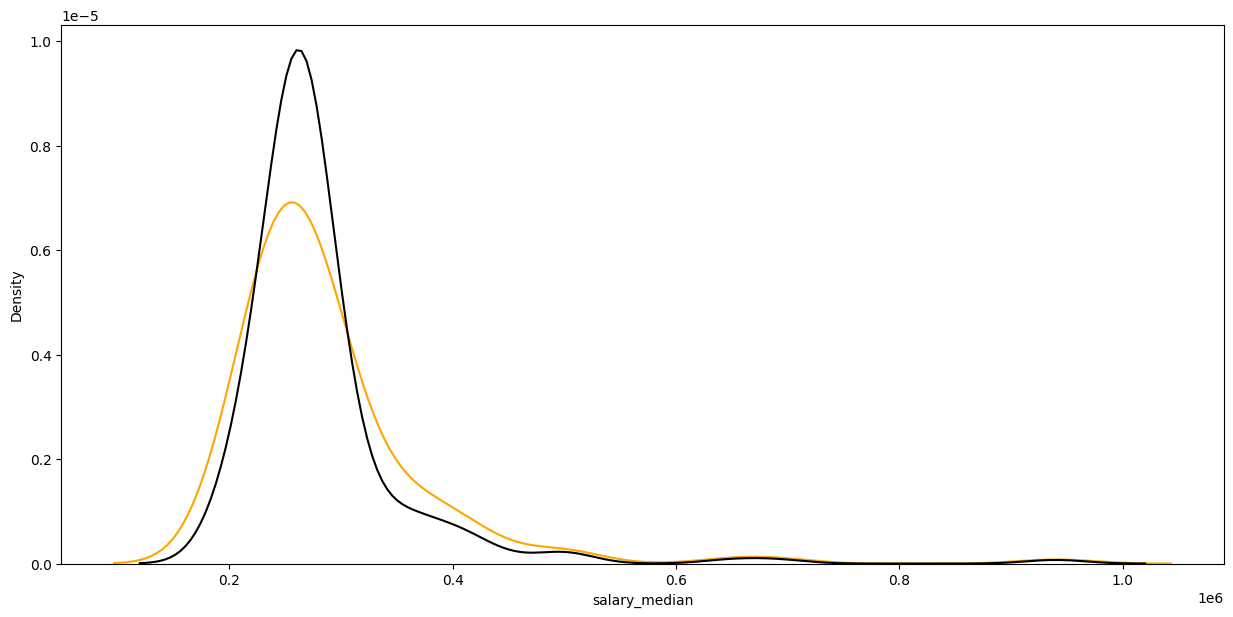

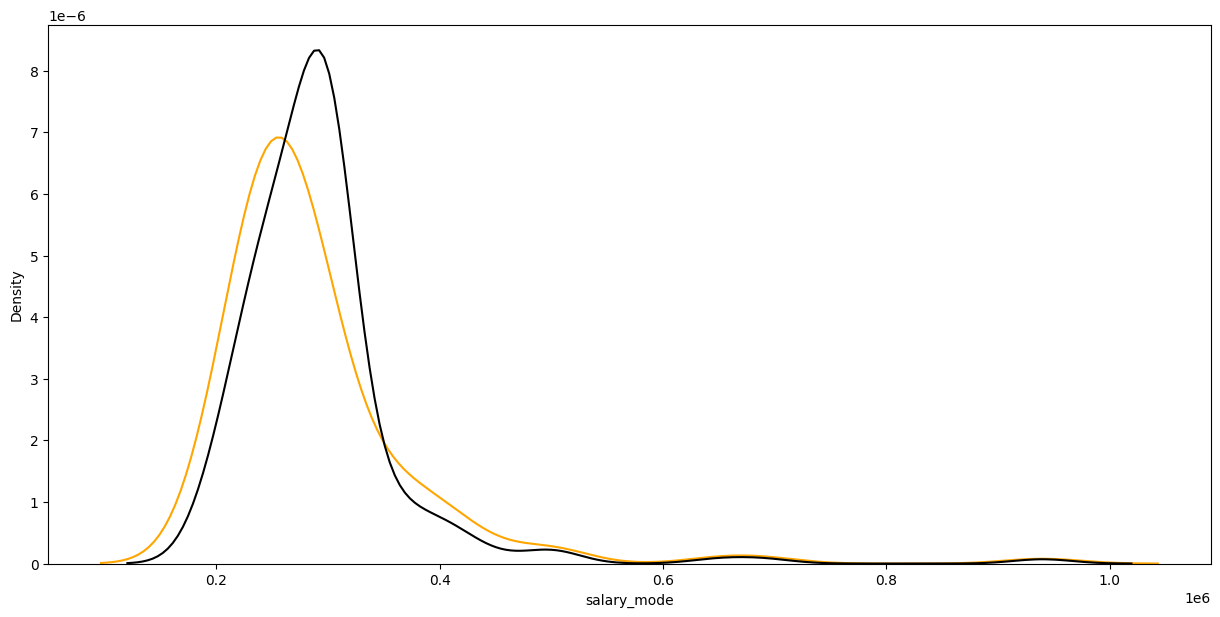

In [ ]:
sallist = ['salary_mean','salary_median','salary_mode']
for sal in sallist:
    plotdistplot(sal)

In [ ]:
# filling the salary with mean

df['salary'] = df['salary'].fillna(df['salary'].mean())
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,salary_mean,salary_median,salary_mode
sl_no,,,,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.000000,270000.000000,270000.0,270000.0
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.000000,200000.000000,200000.0,200000.0
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.000000,250000.000000,250000.0,250000.0
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,288655.405405,288655.405405,265000.0,300000.0
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.000000,425000.000000,425000.0,425000.0


In [ ]:
df = df.drop(columns=['salary_mean', 'salary_median', 'salary_mode'],axis=1)
df.isnull().sum()

,0
gender,0
ssc_p,0
ssc_b,0
hsc_p,0
hsc_b,0
hsc_s,0
degree_p,0
degree_t,0
workex,0
etest_p,0


In [ ]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.000000
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.000000
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.000000
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,288655.405405
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.000000
212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.000000
213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.000000


## EDA

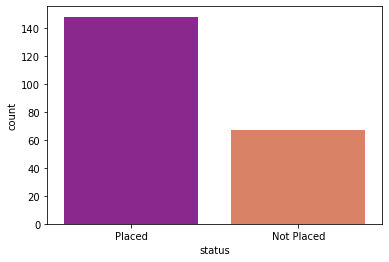

In [ ]:
sn.countplot(df['status'],palette='plasma')

Count Plot for feature gender is shown ↓


/tmp/ipython-input-4149321492.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sn.countplot(df[col],palette='plasma')


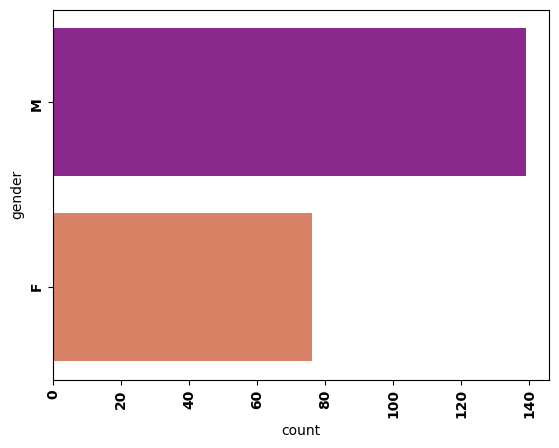

Count Plot for feature ssc_b is shown ↓


/tmp/ipython-input-4149321492.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sn.countplot(df[col],palette='plasma')


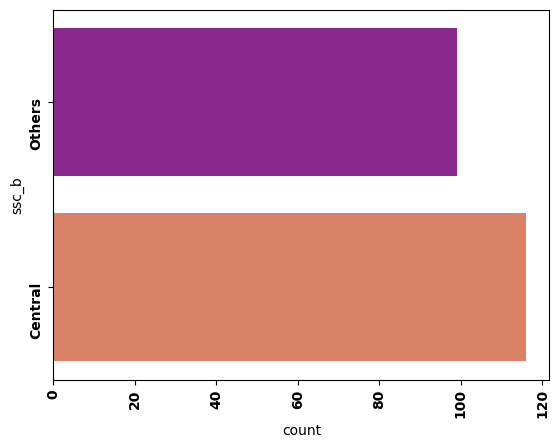

Count Plot for feature hsc_b is shown ↓


/tmp/ipython-input-4149321492.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sn.countplot(df[col],palette='plasma')


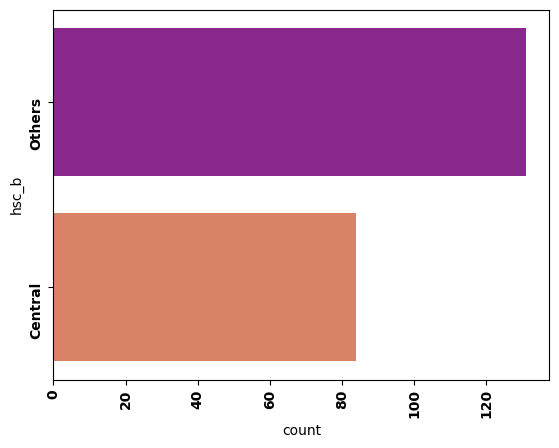

Count Plot for feature hsc_s is shown ↓


/tmp/ipython-input-4149321492.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sn.countplot(df[col],palette='plasma')


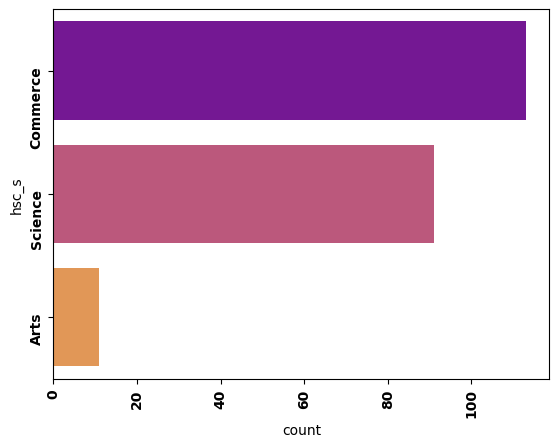

Count Plot for feature degree_t is shown ↓


/tmp/ipython-input-4149321492.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sn.countplot(df[col],palette='plasma')


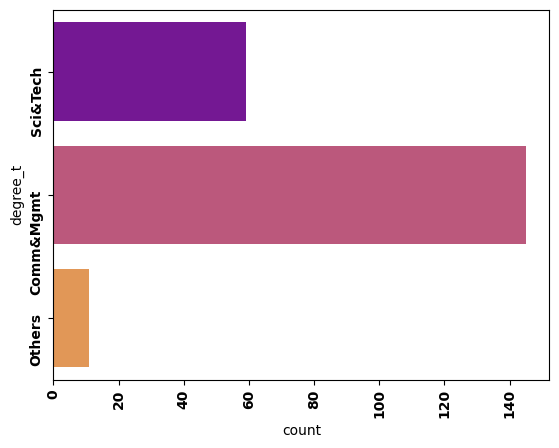

/tmp/ipython-input-4149321492.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sn.countplot(df[col],palette='plasma')


Count Plot for feature workex is shown ↓


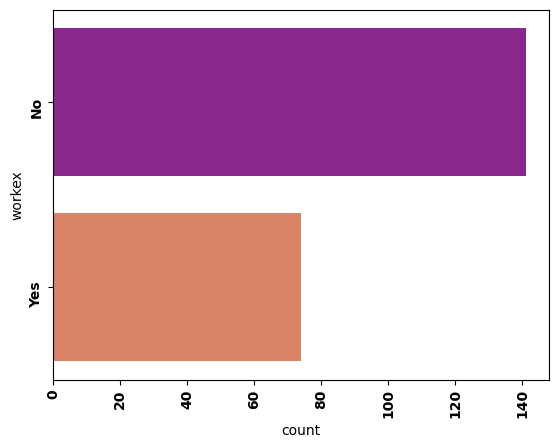

Count Plot for feature specialisation is shown ↓


/tmp/ipython-input-4149321492.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sn.countplot(df[col],palette='plasma')


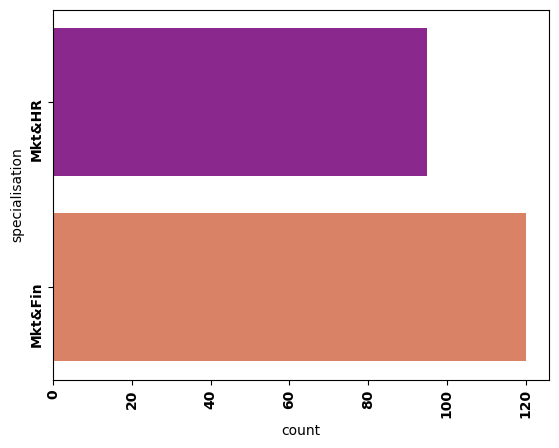

Count Plot for feature status is shown ↓


/tmp/ipython-input-4149321492.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sn.countplot(df[col],palette='plasma')


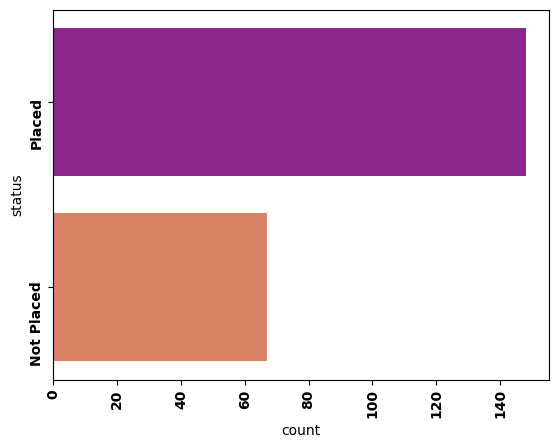

In [ ]:
def valuecount(col):

    return dict(df[col].value_counts())

def getcountplot(col):

    sn.countplot(df[col],palette='plasma')
    plt.xticks(rotation = 'vertical',fontweight = 'bold',fontsize = '10')
    plt.yticks(rotation = 'vertical',fontweight = 'bold',fontsize = '10')
    plt.show()


for col in catvars:
    print(f'Count Plot for feature {col} is shown ↓')
    getcountplot(col)
    print('='*75)

In [ ]:
getfinaldict = {}
for col in catvars:
    getfinaldict[col] = valuecount(col)

getfinaldict

{'gender': {'M': np.int64(139), 'F': np.int64(76)},
 'ssc_b': {'Central': np.int64(116), 'Others': np.int64(99)},
 'hsc_b': {'Others': np.int64(131), 'Central': np.int64(84)},
 'hsc_s': {'Commerce': np.int64(113),
  'Science': np.int64(91),
  'Arts': np.int64(11)},
 'degree_t': {'Comm&Mgmt': np.int64(145),
  'Sci&Tech': np.int64(59),
  'Others': np.int64(11)},
 'workex': {'No': np.int64(141), 'Yes': np.int64(74)},
 'specialisation': {'Mkt&Fin': np.int64(120), 'Mkt&HR': np.int64(95)},
 'status': {'Placed': np.int64(148), 'Not Placed': np.int64(67)}}

In [ ]:
# top science students placed

df[(df['degree_t']=='Sci&Tech')&(df['status']=='Placed')].sort_values(by = 'salary',ascending = False).reset_index().head(5)


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,151,M,71.00,Central,58.66,Central,Science,58.00,Sci&Tech,Yes,56.0,Mkt&Fin,61.30,Placed,690000.0
1,175,M,73.24,Others,50.83,Others,Science,64.27,Sci&Tech,Yes,64.0,Mkt&Fin,66.23,Placed,500000.0
2,164,M,63.00,Others,67.00,Others,Science,64.00,Sci&Tech,No,75.0,Mkt&Fin,66.46,Placed,500000.0
3,78,M,64.00,Others,80.00,Others,Science,65.00,Sci&Tech,Yes,69.0,Mkt&Fin,57.65,Placed,500000.0
4,54,M,80.00,Others,70.00,Others,Science,72.00,Sci&Tech,No,87.0,Mkt&HR,71.04,Placed,450000.0


In [ ]:
# top Comm&Mgt students placed

df[(df['degree_t']=='Comm&Mgmt')&(df['status']=='Placed')].sort_values(by = 'salary',ascending = False).reset_index().head(5)


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,120,M,60.80,Central,68.40,Central,Commerce,64.6,Comm&Mgmt,Yes,82.66,Mkt&Fin,64.34,Placed,940000.0
1,178,F,73.00,Central,97.00,Others,Commerce,79.0,Comm&Mgmt,Yes,89.00,Mkt&Fin,70.81,Placed,650000.0
2,5,M,85.80,Central,73.60,Central,Commerce,73.3,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
3,96,M,73.00,Central,78.00,Others,Commerce,65.0,Comm&Mgmt,Yes,95.46,Mkt&Fin,62.16,Placed,420000.0
4,86,F,83.84,Others,89.83,Others,Commerce,77.2,Comm&Mgmt,Yes,78.74,Mkt&Fin,76.18,Placed,400000.0


In [ ]:
# top Others students placed

df[(df['degree_t']=='Others')&(df['status']=='Placed')].sort_values(by = 'salary',ascending = False).reset_index().head(5)


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,132,F,74.9,Others,57.0,Others,Science,62.00,Others,Yes,80.0,Mkt&Fin,60.78,Placed,360000.0
1,194,F,60.0,Central,63.0,Central,Arts,56.00,Others,Yes,80.0,Mkt&HR,56.63,Placed,300000.0
2,186,F,88.0,Central,72.0,Central,Science,78.00,Others,No,82.0,Mkt&HR,71.43,Placed,252000.0
3,125,M,67.0,Central,71.0,Central,Science,64.33,Others,Yes,64.0,Mkt&HR,61.26,Placed,250000.0
4,149,F,77.0,Central,86.0,Central,Arts,56.00,Others,No,57.0,Mkt&Fin,64.08,Placed,240000.0


In [ ]:
# df['degree_t'].value_counts()

,count
degree_t,
Comm&Mgmt,145
Sci&Tech,59
Others,11


In [ ]:
# max and min salary
# observation : max salary : 9,40,000 and min salary : 2,00,000

df[(df['salary']==max(df['salary'])) | (df['salary']==min(df['salary']))]

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
16,F,65.00,Central,75.00,Central,Commerce,69.00,Comm&Mgmt,Yes,72.00,Mkt&Fin,64.66,Placed,200000.0
45,F,77.00,Others,73.00,Others,Commerce,81.00,Comm&Mgmt,Yes,89.00,Mkt&Fin,69.70,Placed,200000.0
51,F,75.20,Central,73.20,Central,Science,68.40,Comm&Mgmt,No,65.00,Mkt&HR,62.98,Placed,200000.0
108,M,82.00,Others,90.00,Others,Commerce,83.00,Comm&Mgmt,No,80.00,Mkt&HR,73.52,Placed,200000.0
120,M,60.80,Central,68.40,Central,Commerce,64.60,Comm&Mgmt,Yes,82.66,Mkt&Fin,64.34,Placed,940000.0
136,F,72.00,Central,56.00,Others,Science,69.00,Comm&Mgmt,No,55.60,Mkt&HR,65.63,Placed,200000.0


In [ ]:
# students with salary more than avg salary science dept

df[(df['degree_t']=='Sci&Tech')&(df['salary']<df['salary'].mean()) & (df['status']=='Placed')].sort_values(by = 'salary',ascending = False).reset_index()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,188,M,78.50,Central,65.50,Central,Science,67.00,Sci&Tech,Yes,95.00,Mkt&Fin,64.86,Placed,280000.0
1,119,M,76.00,Central,80.00,Central,Science,78.00,Sci&Tech,Yes,97.00,Mkt&HR,70.48,Placed,276000.0
2,70,M,73.00,Central,73.00,Central,Science,66.00,Sci&Tech,Yes,70.00,Mkt&Fin,68.07,Placed,275000.0
3,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.00,Mkt&Fin,53.62,Placed,275000.0
4,79,M,84.00,Others,90.90,Others,Science,64.50,Sci&Tech,No,86.04,Mkt&Fin,59.42,Placed,270000.0
5,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000.0
6,60,M,52.60,Central,65.58,Others,Science,72.11,Sci&Tech,No,57.60,Mkt&Fin,56.66,Placed,265000.0
7,143,M,85.00,Central,60.00,Others,Science,73.43,Sci&Tech,Yes,60.00,Mkt&Fin,61.29,Placed,260000.0
8,198,F,83.96,Others,53.00,Others,Science,91.00,Sci&Tech,No,59.32,Mkt&HR,69.71,Placed,260000.0
9,157,M,84.20,Central,69.40,Central,Science,65.00,Sci&Tech,Yes,80.00,Mkt&HR,52.72,Placed,255000.0


In [ ]:
# students with salary more than avg salary Comm&Mgmt dept

df[(df['degree_t']=='Comm&Mgmt')&(df['salary']<df['salary'].mean())].sort_values(by = 'salary',ascending = False).reset_index()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,7,F,46.0,Others,49.2,Others,Commerce,79.0,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,288655.405405
1,19,F,63.0,Central,66.0,Central,Commerce,64.0,Comm&Mgmt,No,68.00,Mkt&HR,64.08,Not Placed,288655.405405
2,10,M,58.0,Central,70.0,Central,Commerce,61.0,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,288655.405405
3,15,M,62.0,Central,47.0,Central,Commerce,50.0,Comm&Mgmt,No,76.00,Mkt&HR,54.96,Not Placed,288655.405405
4,13,F,47.0,Central,55.0,Others,Science,65.0,Comm&Mgmt,No,62.00,Mkt&HR,65.04,Not Placed,288655.405405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,16,F,65.0,Central,75.0,Central,Commerce,69.0,Comm&Mgmt,Yes,72.00,Mkt&Fin,64.66,Placed,200000.000000
109,45,F,77.0,Others,73.0,Others,Commerce,81.0,Comm&Mgmt,Yes,89.00,Mkt&Fin,69.70,Placed,200000.000000
110,51,F,75.2,Central,73.2,Central,Science,68.4,Comm&Mgmt,No,65.00,Mkt&HR,62.98,Placed,200000.000000
111,136,F,72.0,Central,56.0,Others,Science,69.0,Comm&Mgmt,No,55.60,Mkt&HR,65.63,Placed,200000.000000


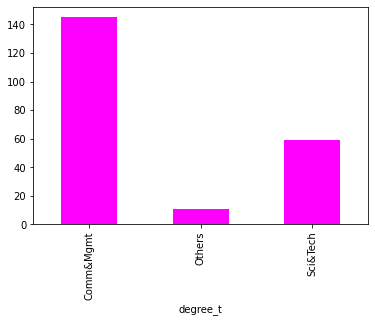

In [ ]:
# maximum students placed are from comm&mgt

df.groupby(['degree_t'])['status'].count().plot(kind = 'bar',color = 'magenta')

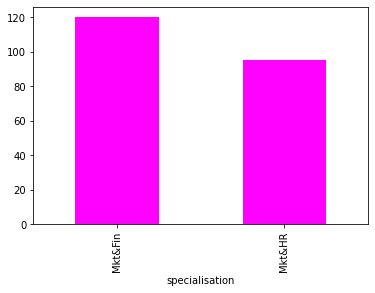

In [ ]:
# Marketing and Finance specialisation are placed more

df.groupby(['specialisation'])['status'].count().plot(kind = 'bar',color = 'magenta')

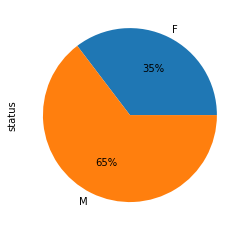

In [ ]:
# females placed 35% and males 65%

df.groupby(['gender'])['status'].count().plot(kind = 'pie',autopct='%1.0f%%')

In [ ]:
# max female salary ~ 6,50,000

temp = df[df['gender']=='F']
temp[temp['salary']==max(temp['salary'])].style.background_gradient(cmap = 'plasma')

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
178,F,73.000000,Central,97.000000,Others,Commerce,79.000000,Comm&Mgmt,Yes,89.000000,Mkt&Fin,70.810000,Placed,650000.000000


In [ ]:
# max female salary ~ 6,50,000

temp = df[df['gender']=='F']
temp[temp['salary']==min(temp['salary'])].style.background_gradient(cmap = 'plasma')

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
16,F,65.000000,Central,75.000000,Central,Commerce,69.000000,Comm&Mgmt,Yes,72.000000,Mkt&Fin,64.660000,Placed,200000.000000
45,F,77.000000,Others,73.000000,Others,Commerce,81.000000,Comm&Mgmt,Yes,89.000000,Mkt&Fin,69.700000,Placed,200000.000000
51,F,75.200000,Central,73.200000,Central,Science,68.400000,Comm&Mgmt,No,65.000000,Mkt&HR,62.980000,Placed,200000.000000
136,F,72.000000,Central,56.000000,Others,Science,69.000000,Comm&Mgmt,No,55.600000,Mkt&HR,65.630000,Placed,200000.000000


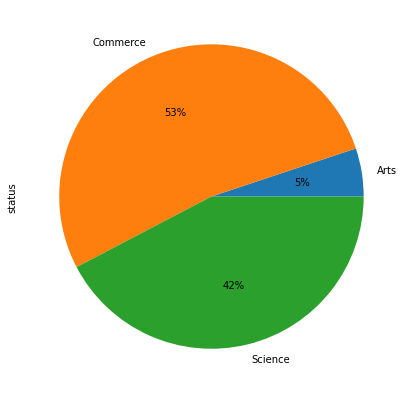

In [ ]:
df.groupby(['hsc_s'])['status'].count().plot(kind = 'pie',autopct='%1.0f%%',figsize=(15,7))

In [ ]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.000000
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.000000
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.000000
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,288655.405405
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.000000


In [ ]:
getfinaldict

{'gender': {'M': np.int64(139), 'F': np.int64(76)},
 'ssc_b': {'Central': np.int64(116), 'Others': np.int64(99)},
 'hsc_b': {'Others': np.int64(131), 'Central': np.int64(84)},
 'hsc_s': {'Commerce': np.int64(113),
  'Science': np.int64(91),
  'Arts': np.int64(11)},
 'degree_t': {'Comm&Mgmt': np.int64(145),
  'Sci&Tech': np.int64(59),
  'Others': np.int64(11)},
 'workex': {'No': np.int64(141), 'Yes': np.int64(74)},
 'specialisation': {'Mkt&Fin': np.int64(120), 'Mkt&HR': np.int64(95)},
 'status': {'Placed': np.int64(148), 'Not Placed': np.int64(67)}}

In [ ]:
len(getfinaldict['status']),len(getfinaldict['degree_t'])

(2, 3)

In [ ]:
boolcols = [key for key,value in getfinaldict.items() if len(getfinaldict[key])==2]
tripcols = [key for key in list(getfinaldict.keys()) if key not in boolcols]

print(boolcols,tripcols)

['gender', 'ssc_b', 'hsc_b', 'workex', 'specialisation', 'status'] ['hsc_s', 'degree_t']


## Label Encoding process

In [ ]:
def labelencode(le,col):

    df[col] = le.fit_transform(df[col])


getmappings = {}
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in list(getfinaldict.keys()):
    labelencode(le,col)
    getmappings[col] = dict(zip(le.classes_,le.transform(le.classes_)))


df.head()


,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.000000
2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.000000
3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.000000
4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,288655.405405
5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.000000


In [ ]:
# this was the internal mapping structure followed by label encoder for mapping

getmappings

{'gender': {'F': np.int64(0), 'M': np.int64(1)},
 'ssc_b': {'Central': np.int64(0), 'Others': np.int64(1)},
 'hsc_b': {'Central': np.int64(0), 'Others': np.int64(1)},
 'hsc_s': {'Arts': np.int64(0),
  'Commerce': np.int64(1),
  'Science': np.int64(2)},
 'degree_t': {'Comm&Mgmt': np.int64(0),
  'Others': np.int64(1),
  'Sci&Tech': np.int64(2)},
 'workex': {'No': np.int64(0), 'Yes': np.int64(1)},
 'specialisation': {'Mkt&Fin': np.int64(0), 'Mkt&HR': np.int64(1)},
 'status': {'Not Placed': np.int64(0), 'Placed': np.int64(1)}}

In [ ]:
# removing unwated columns

# df = df.drop(['sl_no'],axis=1)
# df.head(2)

KeyError: "['sl_no'] not found in axis"

## Numerical Columns EDA

In [ ]:
numvars[:]

['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

Distribution plots for col : ssc_p are shown ↓


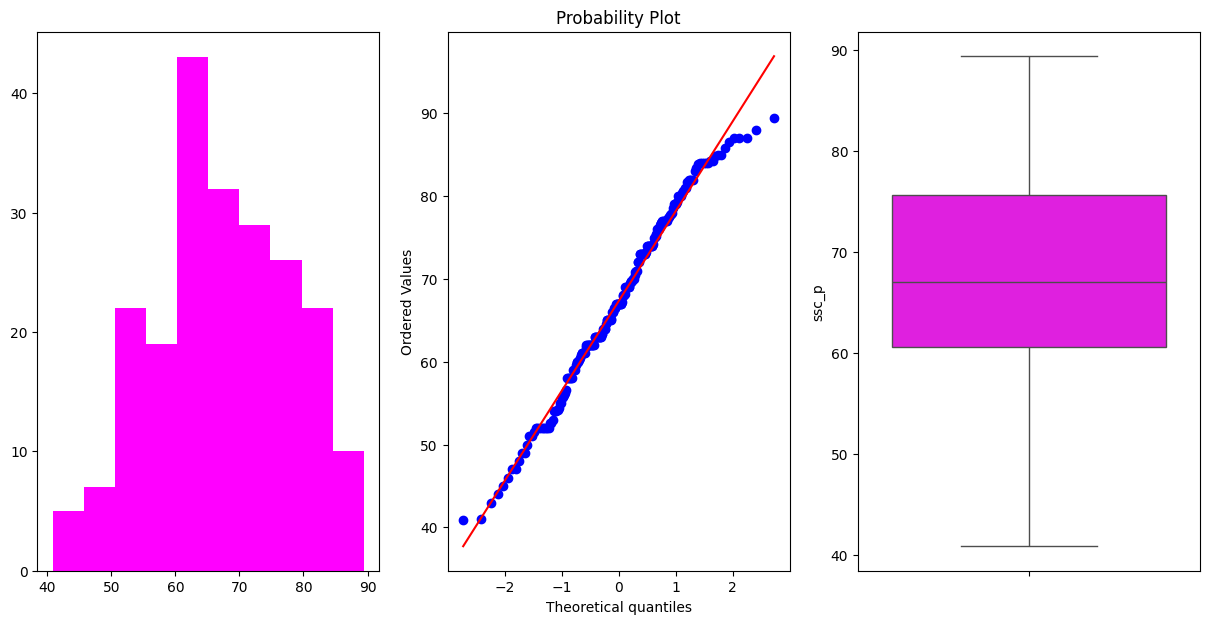

Distribution plots for col : hsc_p are shown ↓


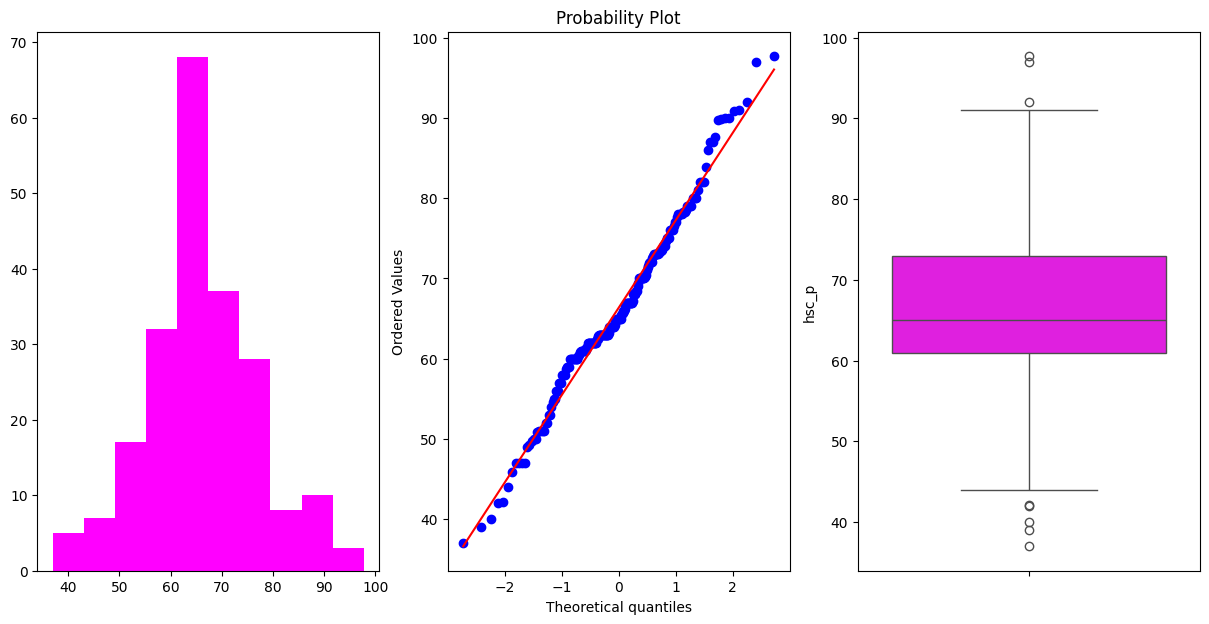

Distribution plots for col : degree_p are shown ↓


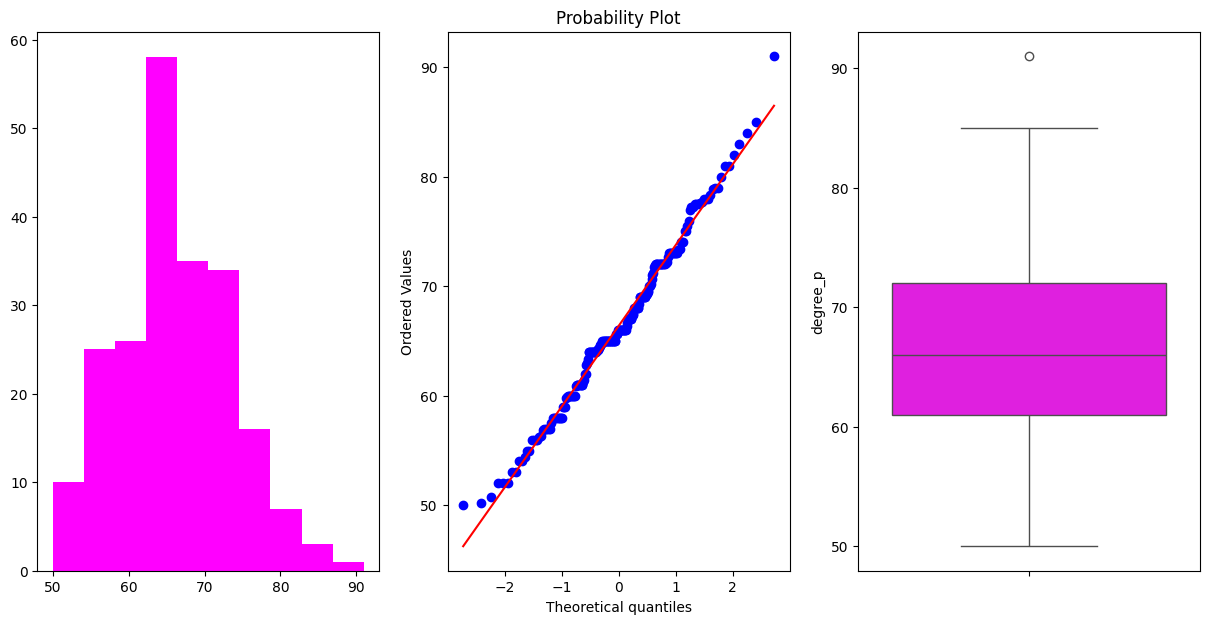

Distribution plots for col : etest_p are shown ↓


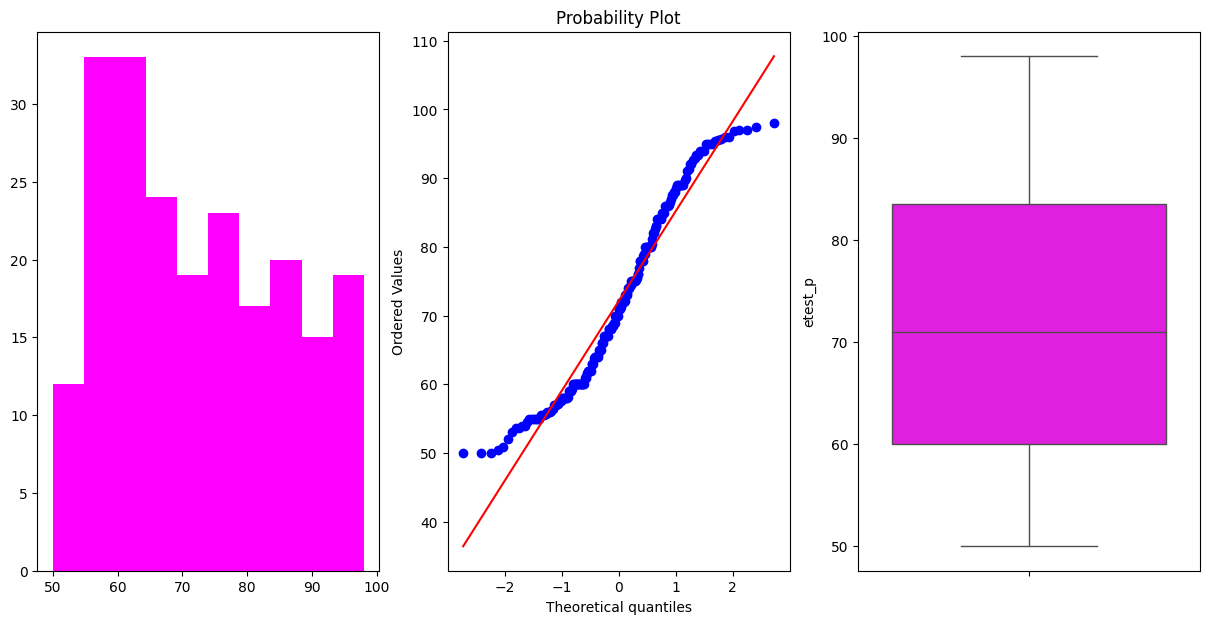

Distribution plots for col : mba_p are shown ↓


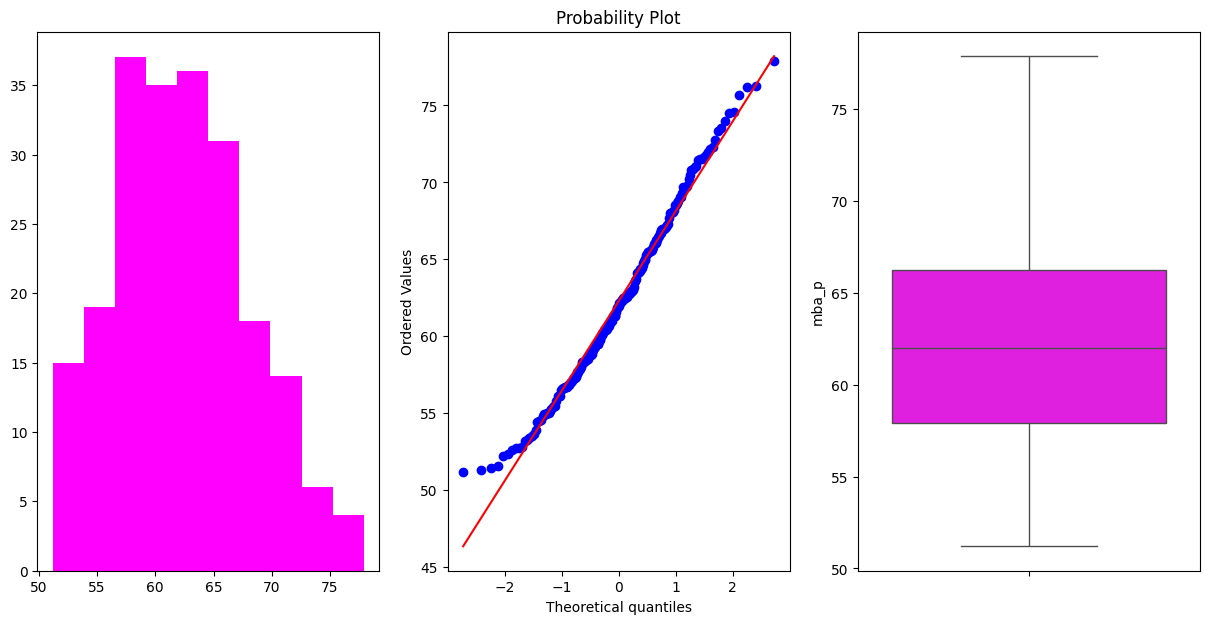

Distribution plots for col : salary are shown ↓


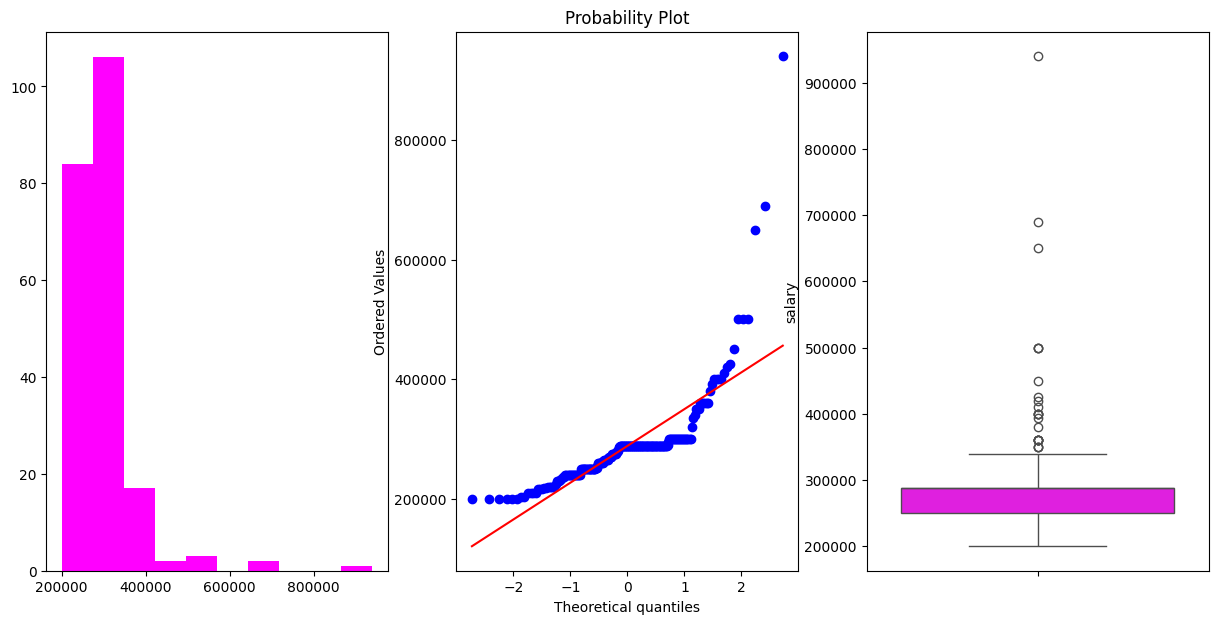

In [ ]:
import scipy.stats as stats

def getplots(df,col):

    plt.figure(figsize=(15,7))
    plt.subplot(1,3,1)
    plt.hist(df[col],color='magenta')

    plt.subplot(1,3,2)
    stats.probplot(df[col],dist='norm',plot=plt)

    plt.subplot(1,3,3)
    sn.boxplot(df[col],color='magenta')

    plt.show()


for col in numvars[:]:
    print(f'Distribution plots for col : {col} are shown ↓')
    getplots(df,col)
    print('='*10)

# Feature Selection

In [ ]:
df.corr(method='spearman')

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
gender,1.000000,-0.103105,0.019429,0.000392,0.065945,0.062525,-0.161056,0.051806,0.085153,0.088126,-0.106160,-0.317759,0.090670,0.135540
ssc_p,-0.103105,1.000000,0.116185,0.490028,0.065607,0.227790,0.550469,0.195233,0.196445,0.270336,-0.182956,0.398587,0.600001,-0.038574
ssc_b,0.019429,0.116185,1.000000,-0.158161,0.605883,0.054516,0.013092,0.099191,-0.040744,-0.018123,-0.051565,0.080138,0.037297,0.052198
hsc_p,0.000392,0.490028,-0.158161,1.000000,-0.084743,-0.204382,0.433140,-0.111676,0.125925,0.214212,-0.248417,0.317190,0.463597,-0.056405
hsc_b,0.065945,0.065607,0.605883,-0.084743,1.000000,0.145497,0.047349,0.046264,0.038357,0.027732,0.002232,0.079871,0.016945,0.019128
hsc_s,0.062525,0.227790,0.054516,-0.204382,0.145497,1.000000,0.128449,0.622070,0.017158,0.063877,0.173042,0.051460,0.024567,0.035565
degree_p,-0.161056,0.550469,0.013092,0.433140,0.047349,0.128449,1.000000,0.052984,0.138849,0.198741,-0.210922,0.379493,0.495386,-0.137430
degree_t,0.051806,0.195233,0.099191,-0.111676,0.046264,0.622070,0.052984,1.000000,0.105217,0.010125,0.091643,0.111173,-0.030978,0.147861
workex,0.085153,0.196445,-0.040744,0.125925,0.038357,0.017158,0.138849,0.105217,1.000000,0.056328,-0.191174,0.155528,0.276060,0.015073
etest_p,0.088126,0.270336,-0.018123,0.214212,0.027732,0.063877,0.198741,0.010125,0.056328,1.000000,-0.223480,0.216701,0.114024,0.187516


<Axes: >

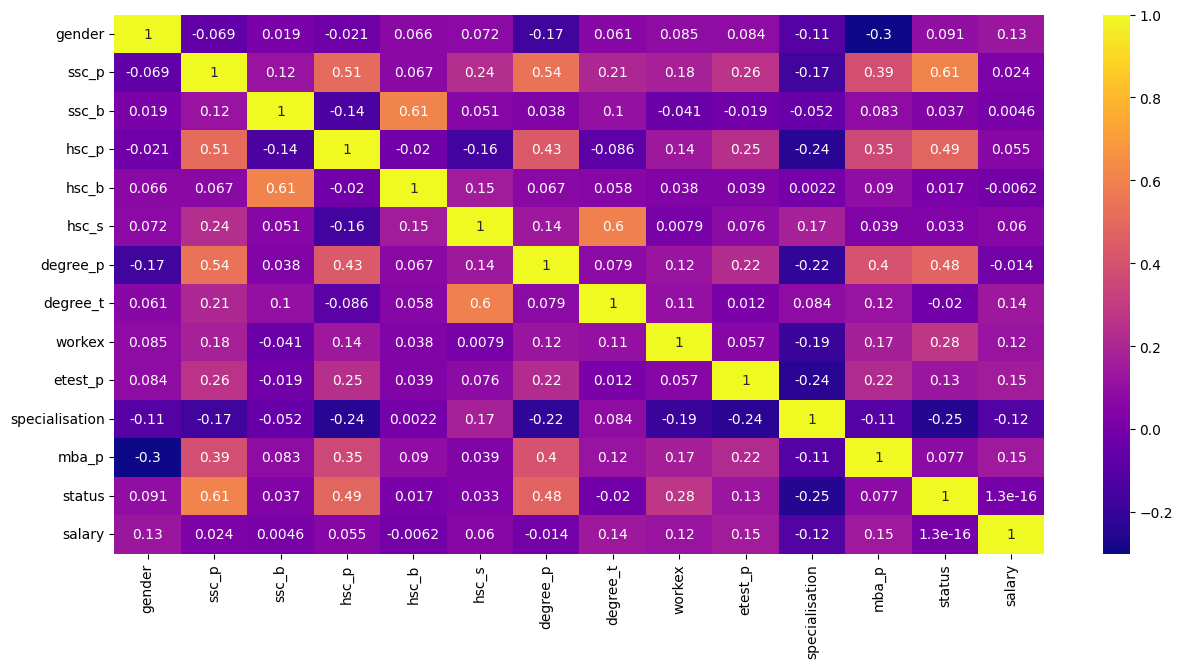

In [ ]:
# checking for tightly correlated features

plt.figure(figsize=(15,7))
sn.heatmap(df.corr(),annot=True,cmap='plasma')